Electromyography (EMG):

EMG is a technique that involves recording and analyzing the electrical activity produced by skeletal muscles.
It is commonly used in various applications, including prosthetics, to capture signals related to muscle contractions and movements.
Non-Invasive:

Non-invasive approaches involve methods that do not require the penetration of the skin or any other body surface. In the context of prosthetics, this often refers to methods that don't require surgery.
Naturally-Controlled:

Naturally-controlled prosthetics aim to provide a more intuitive and natural interface for users. This often involves capturing and interpreting signals directly related to the user's intended movements.
Robotic Hand Prostheses:

Robotic hand prostheses are artificial hands designed to replace or augment the functionality of a missing hand.
These prostheses can be controlled using various methods, including EMG signals, to enable users to perform a range of hand movements.

The EMG signals were recorded from 12 electrodes placed on the forearm and upper arm.

14 column of output is angles that describe the motion

In [1]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np

# Specify the path to your .npy file
file_path = '/content/drive/MyDrive/X_train_tabular.npy'

# Load the .npy file
x = np.load(file_path)

# Print the array values
print("Array Values:")
print(x)


Array Values:
[[-2.8512097e-06  3.3552608e-06  1.5988660e-06 ...  1.4699236e-06
  -5.6090889e-06  4.0180992e-05]
 [-4.6977384e-06  3.3552124e-06  1.4304406e-06 ...  2.4781623e-06
  -3.2593930e-06  4.9580311e-05]
 [-2.6837340e-06  4.0265595e-06  9.2631649e-07 ...  2.4793057e-06
  -7.0452693e-08  4.7062331e-05]
 ...
 [ 1.2604414e-05  3.4272251e-08 -2.9844853e-07 ... -1.0334954e-05
  -9.0856147e-06 -2.2172696e-06]
 [ 4.8833322e-06 -6.3691493e-07 -1.8085398e-06 ... -4.9637788e-06
  -1.0932163e-05 -1.0424706e-06]
 [ 2.7012754e-06 -1.6438012e-06 -4.6614246e-06 ...  1.4842431e-05
  -1.1603769e-05  1.3072749e-06]]


In [3]:
len(x)

4361620

In [4]:
x.shape

(4361620, 12)

In [5]:

# Specify the path to your .npy file
file_path = '/content/drive/MyDrive/y_train_tabular.npy'

# Load the .npy file
y = np.load(file_path)

# Print the array values
print("Array Values:")
print(y)


Array Values:
[[ 7.80701727 14.62264061 32.20779657 ... 52.83019066  8.73786449
  62.36842453]
 [ 7.80701727 14.62264061 32.20779657 ... 52.83019066  8.73786449
  62.36842453]
 [ 7.80701727 14.62264061 32.20779657 ... 52.83019066  8.73786449
  62.36842453]
 ...
 [ 6.65093914 12.72727251 24.16666746 ... 98.12293768 57.67605007
  65.25891781]
 [ 6.64944917 12.72727251 24.16666746 ... 98.09273243 57.67605007
  65.27244151]
 [ 6.64795786 12.72727251 24.16666746 ... 98.06253433 57.67605007
  65.28595984]]


In [6]:
len(y)

4361620

In [7]:
y.shape

(4361620, 14)

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assuming X is your input data and Y is your target data
# Convert your numpy arrays to PyTorch tensors
X = torch.tensor(x, dtype=torch.float32)
Y = torch.tensor(y, dtype=torch.float32)

In [9]:
  X

tensor([[-2.8512e-06,  3.3553e-06,  1.5989e-06,  ...,  1.4699e-06,
         -5.6091e-06,  4.0181e-05],
        [-4.6977e-06,  3.3552e-06,  1.4304e-06,  ...,  2.4782e-06,
         -3.2594e-06,  4.9580e-05],
        [-2.6837e-06,  4.0266e-06,  9.2632e-07,  ...,  2.4793e-06,
         -7.0453e-08,  4.7062e-05],
        ...,
        [ 1.2604e-05,  3.4272e-08, -2.9845e-07,  ..., -1.0335e-05,
         -9.0856e-06, -2.2173e-06],
        [ 4.8833e-06, -6.3691e-07, -1.8085e-06,  ..., -4.9638e-06,
         -1.0932e-05, -1.0425e-06],
        [ 2.7013e-06, -1.6438e-06, -4.6614e-06,  ...,  1.4842e-05,
         -1.1604e-05,  1.3073e-06]])

In [10]:
Y

tensor([[ 7.8070, 14.6226, 32.2078,  ..., 52.8302,  8.7379, 62.3684],
        [ 7.8070, 14.6226, 32.2078,  ..., 52.8302,  8.7379, 62.3684],
        [ 7.8070, 14.6226, 32.2078,  ..., 52.8302,  8.7379, 62.3684],
        ...,
        [ 6.6509, 12.7273, 24.1667,  ..., 98.1229, 57.6760, 65.2589],
        [ 6.6494, 12.7273, 24.1667,  ..., 98.0927, 57.6760, 65.2724],
        [ 6.6480, 12.7273, 24.1667,  ..., 98.0625, 57.6760, 65.2860]])

DNN Archticture

In [11]:
import torch

# Check if CUDA (GPU support) is available
if torch.cuda.is_available():
    print("GPU is available!")
else:
    print("GPU is not available. Using CPU.")

GPU is not available. Using CPU.


In [12]:
if torch.cuda.is_available():
    X,Y = X.to('cuda'), Y.to('cuda')

In [13]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(12, 64)  # INPUT
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 14)  # Output

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x



In [14]:

epochs = 10
batch_size = 64

# Create DataLoader
dataset = TensorDataset(X, Y)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


model = NeuralNetwork()
if torch.cuda.is_available():
    model = model.to('cuda')

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)







Epoch [1/10], Avg. Loss: 317.2630
Epoch 1/10, Loss: 301.83685302734375
Epoch [2/10], Avg. Loss: 317.2529
Epoch 2/10, Loss: 283.6191711425781
Epoch [3/10], Avg. Loss: 317.2538
Epoch 3/10, Loss: 500.1053161621094
Epoch [4/10], Avg. Loss: 317.2425
Epoch 4/10, Loss: 348.75372314453125
Epoch [5/10], Avg. Loss: 317.2373
Epoch 5/10, Loss: 300.3931579589844
Epoch [6/10], Avg. Loss: 317.2348
Epoch 6/10, Loss: 239.70510864257812
Epoch [7/10], Avg. Loss: 317.2335
Epoch 7/10, Loss: 336.9353942871094
Epoch [8/10], Avg. Loss: 317.2346
Epoch 8/10, Loss: 410.6955261230469
Epoch [9/10], Avg. Loss: 317.2225
Epoch 9/10, Loss: 356.4151916503906
Epoch [10/10], Avg. Loss: 317.2167
Epoch 10/10, Loss: 333.28643798828125


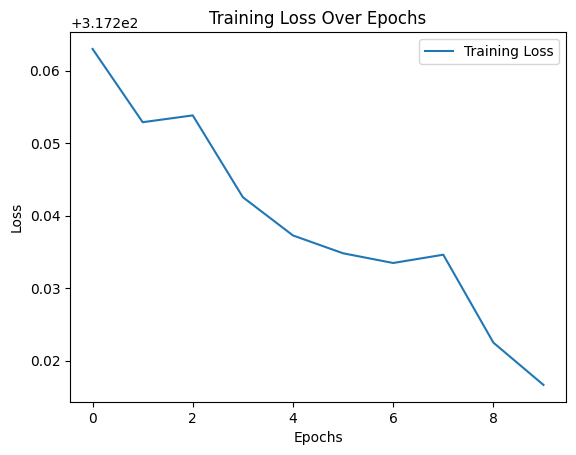

In [16]:
import matplotlib.pyplot as plt

all_losses = []
# Training loop
for epoch in range(epochs):
    epoch_loss=0.0
    for batch_X, batch_Y in dataloader:
        if torch.cuda.is_available():
          batch_X, batch_Y = batch_X.to('cuda'), batch_Y.to('cuda')
        optimizer.zero_grad()
        output = model(batch_X)
        loss = criterion(output, batch_Y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    # Calculate average loss for the epoch
    avg_epoch_loss = epoch_loss / len(dataloader)

    # Print the average loss for the epoch
    print(f'Epoch [{epoch+1}/{epochs}], Avg. Loss: {avg_epoch_loss:.4f}')

    # Save the average loss for plotting
    all_losses.append(avg_epoch_loss)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')





In [17]:
%matplotlib inline

Conclusion :

DNN is poor while dealing with this signal data , we will try CNN